In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # structure of the NN
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # learning rate
        self.lr = learningrate
        
        # weight matrices
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # activation function: sigmoid function
        self.activation_function = lambda x:scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
    def train(self, inputs_list, targets_list):
        # convert input to 2d array
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T
        
        # calculate the input for the hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the output of the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate the input for the output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the output of the output layer
        final_outputs = self.activation_function(final_inputs)
    
        # calculate the output layer errors
        output_errors = targets - final_outputs
        # calculate the hidden layer errors
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights between hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1 - final_outputs)), np.transpose(hidden_outputs))

        # update the weights between input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)), np.transpose(inputs))

        
    def query(self, input_list):
        # convert input to 2d array
        inputs = np.array(input_list, ndmin = 2).T
        
        # calculate the input for the hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the output of the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate the input for the output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the output of the output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    def backquery(self, targets_list):
        final_outputs = np.array(targets_list, ndmin=2).T
        
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = np.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = np.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs


In [3]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10


learning_rate = 0.1

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


In [4]:
training_data_file = open("mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()


In [5]:
epochs = 5
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

In [6]:
test_data_file = open("mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [7]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


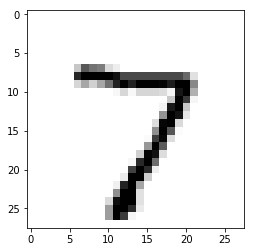

In [8]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation = "None")

In [9]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.01039834],
       [0.01954323],
       [0.00277162],
       [0.003954  ],
       [0.00329971],
       [0.03025263],
       [0.00878582],
       [0.98974506],
       [0.00607301],
       [0.01265952]])

In [10]:
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (np.asfarray(all_values[1:])/ 255.0 * 0.99)
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9738


In [11]:
import glob
import imageio

ssz_dataset = []



label = 9

img_array = imageio.imread('9.png')
gray=lambda rgb:np.dot(rgb[...,:3],[0.21,0.72,0.07])
img_array=gray(img_array) 
img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01
print(np.min(img_data))
print(np.max(img_data))
record = np.append(label, img_data)
ssz_dataset.append(record)



0.010000000000000111
0.9955741176470588


[[0.00048315]
 [0.00939643]
 [0.01639996]
 [0.07360917]
 [0.03974905]
 [0.00857825]
 [0.00792332]
 [0.01567834]
 [0.01048958]
 [0.03026713]]
3


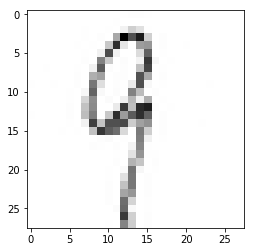

In [12]:
item = 0
plt.imshow(ssz_dataset[item][1:].reshape(28, 28), cmap = 'Greys', interpolation='none')

inputs = ssz_dataset[item][1:]
outputs = n.query(inputs)
print(outputs)

label = np.argmax(outputs)
print(label)





[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


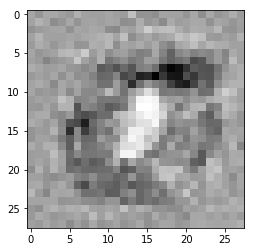

In [13]:
# run the network backwards, given a label, see what image it produces

# label to test
label = 0
# create the output signals for this label
targets = np.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')
